In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [59]:
df = pd.read_csv('/content/train.csv.zip')

In [60]:
df.head()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2,...,0,Mid,Medium,89,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3,...,3,Mid,Medium,21,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0,...,3,Mid,Medium,74,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1,...,2,Mid,Small,50,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0,...,0,Senior,Medium,68,No,No,No,Fair,Medium,Stayed


In [61]:
df= df[['Age','Years at Company','Monthly Income','Job Satisfaction','Attrition']]



In [62]:
df.shape

(59598, 5)

In [63]:
df.isnull().sum()

,0
Age,0
Years at Company,0
Monthly Income,0
Job Satisfaction,0
Attrition,0


In [64]:
df.dtypes

,0
Age,int64
Years at Company,int64
Monthly Income,int64
Job Satisfaction,object
Attrition,object


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59598 entries, 0 to 59597
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               59598 non-null  int64 
 1   Years at Company  59598 non-null  int64 
 2   Monthly Income    59598 non-null  int64 
 3   Job Satisfaction  59598 non-null  object
 4   Attrition         59598 non-null  object
dtypes: int64(3), object(2)
memory usage: 2.3+ MB


In [67]:
df.duplicated().any()

True

In [68]:
df.drop_duplicates(inplace=True)


In [69]:
df.duplicated().any()

False

In [70]:
df.describe()

,Age,Years at Company,Monthly Income
count,59563.000000,59563.000000,59563.000000
mean,38.569531,15.756443,7302.697698
std,12.078196,11.246613,2151.504791
min,18.000000,1.000000,1316.000000
25%,28.000000,7.000000,5658.000000
50%,39.000000,13.000000,7354.000000
75%,49.000000,23.000000,8881.000000
max,59.000000,51.000000,16149.000000


In [71]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Attrition'] = le.fit_transform(df['Attrition'])
df['Job Satisfaction']=le.fit_transform(df['Job Satisfaction'])
df

,Age,Years at Company,Monthly Income,Job Satisfaction,Attrition
0,31,19,5390,2,1
1,59,4,5534,0,1
2,24,10,8159,0,1
3,36,7,3989,0,1
4,56,41,4821,3,1
...,...,...,...,...,...
59593,50,12,4414,0,0
59594,18,4,8040,0,0
59595,22,14,7944,0,1
59596,23,8,2931,3,0


In [72]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df['Age'] = sc.fit_transform(df[['Age']])
df['Years at Company'] = sc.fit_transform(df[['Years at Company']])
df['Monthly Income'] = sc.fit_transform(df[['Monthly Income']])


# EDA

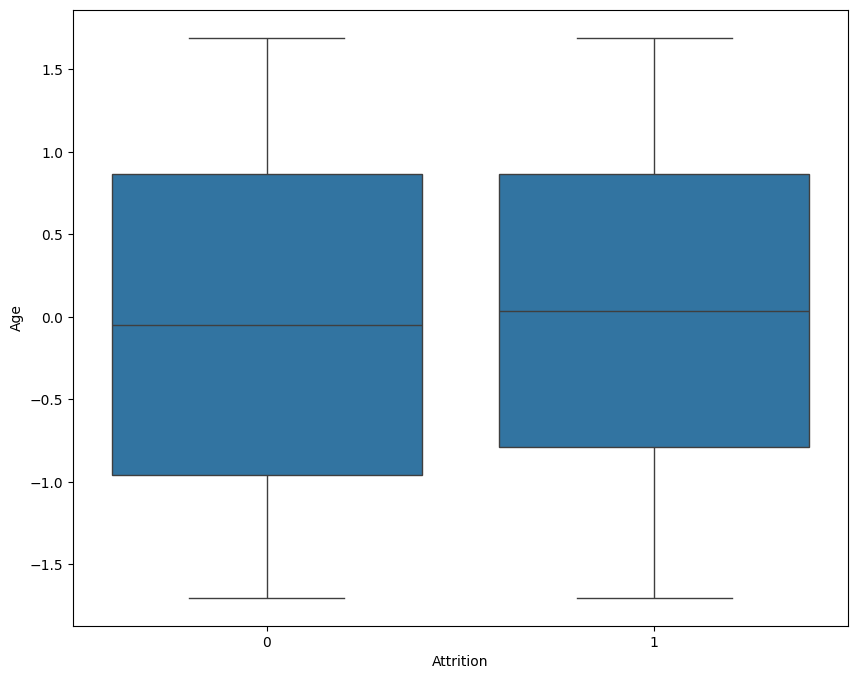

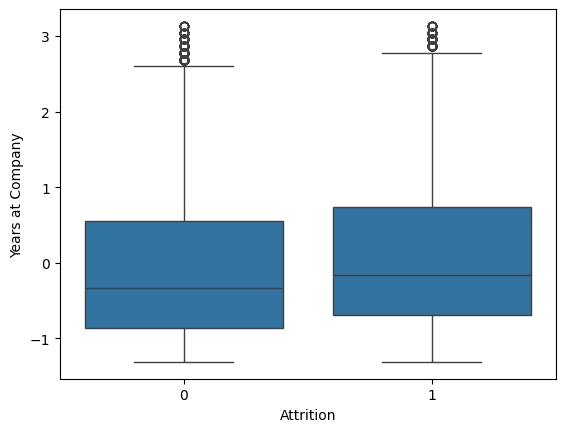

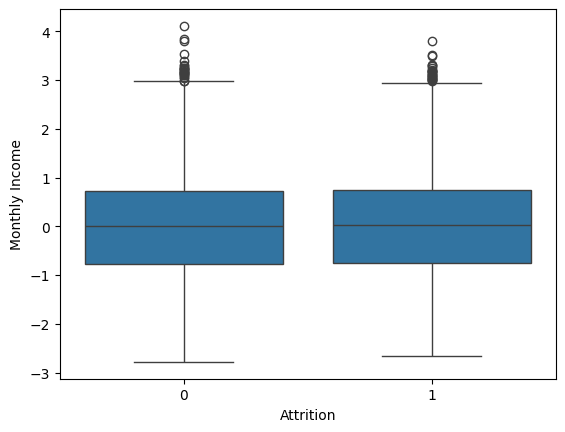

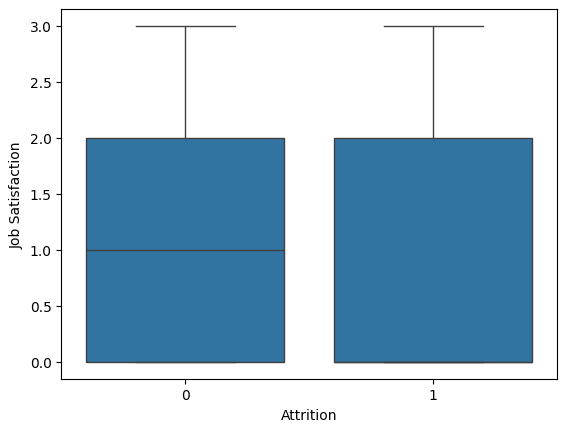

In [73]:
#Box plots: Box plots are useful for comparing the distribution of numerical features (Age, Years at Company) across different attrition categories. They help identify potential differences in medians, quartiles, and outliers.
columns = ['Age','Years at Company','Monthly Income','Job Satisfaction']


plt.figure(figsize=(10,8))
for column in columns:
  sns.boxplot(x='Attrition',y=column,data=df)
  plt.show()

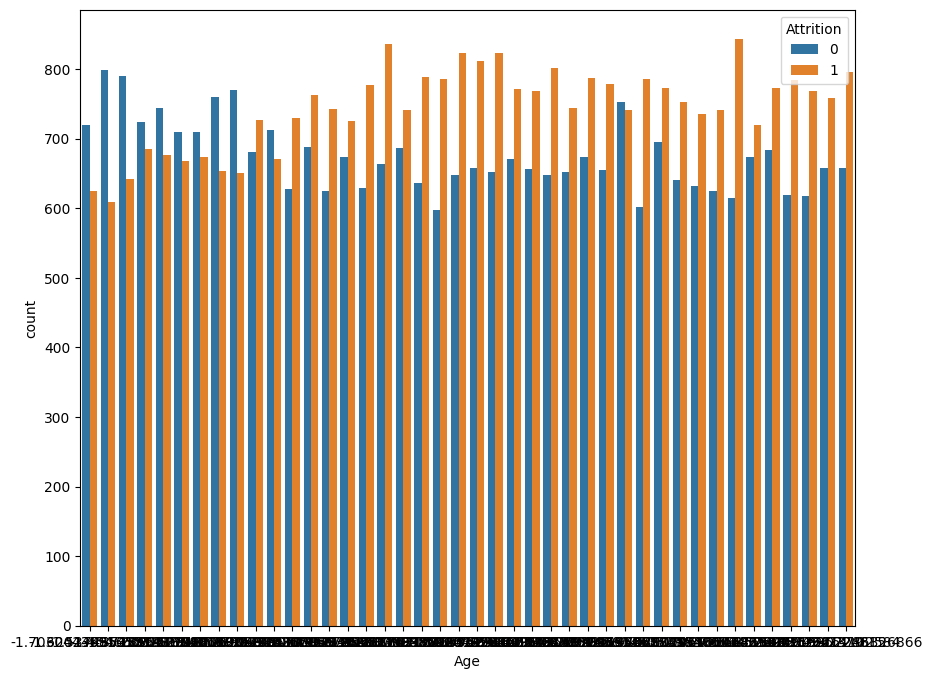

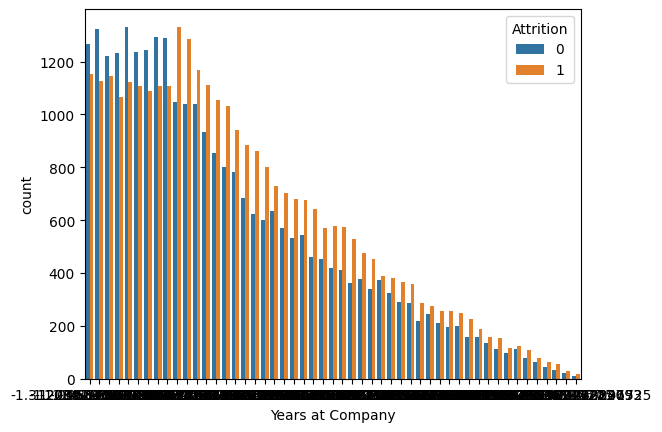

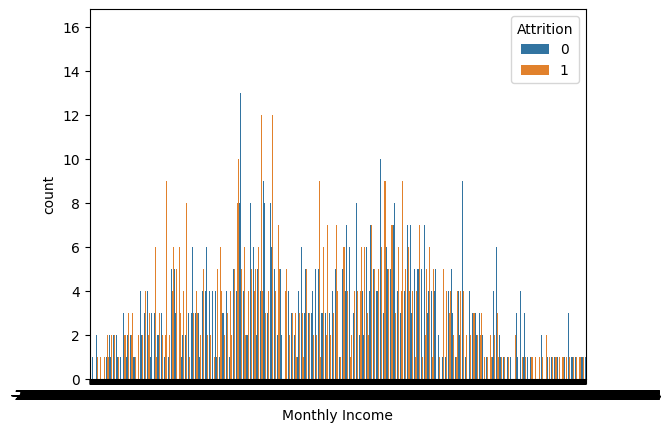

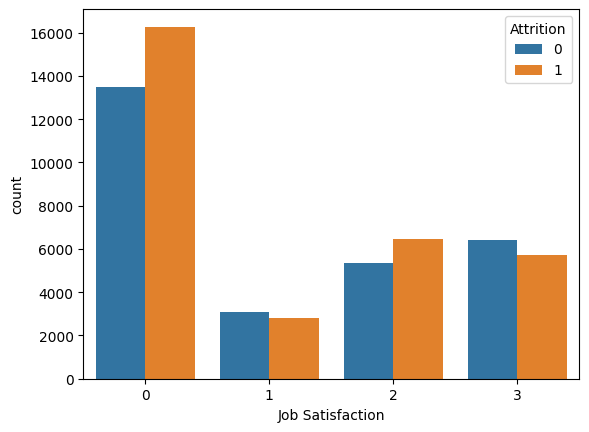

In [74]:
columns = ['Age','Years at Company','Monthly Income','Job Satisfaction']

plt.figure(figsize=(10,8))
for column in columns:
  sns.countplot(x=column, hue='Attrition', data=df)
  plt.show()

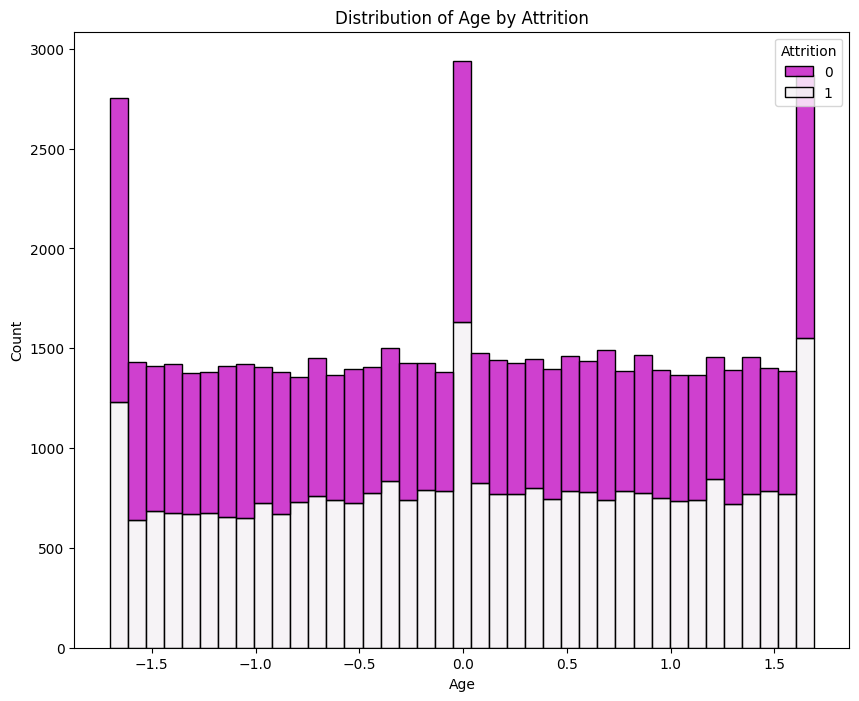

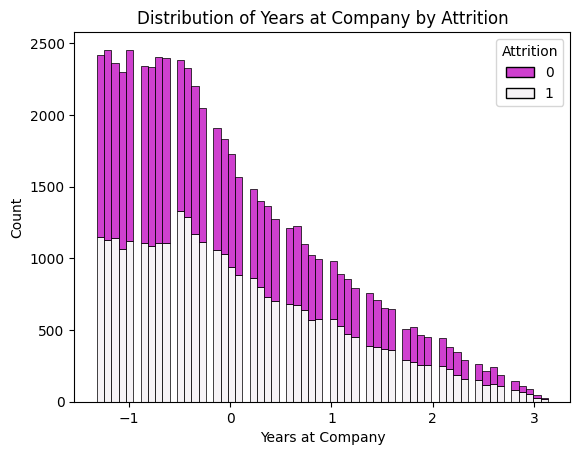

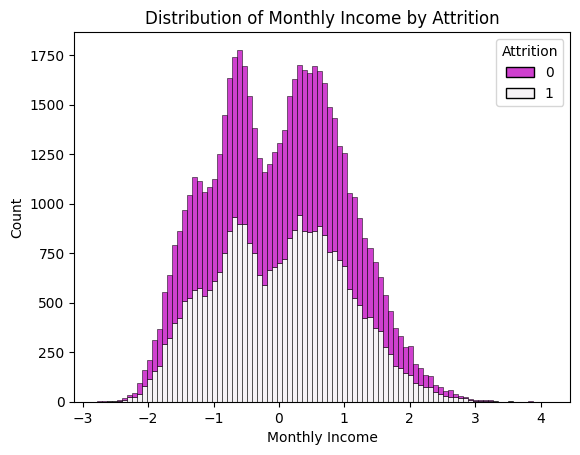

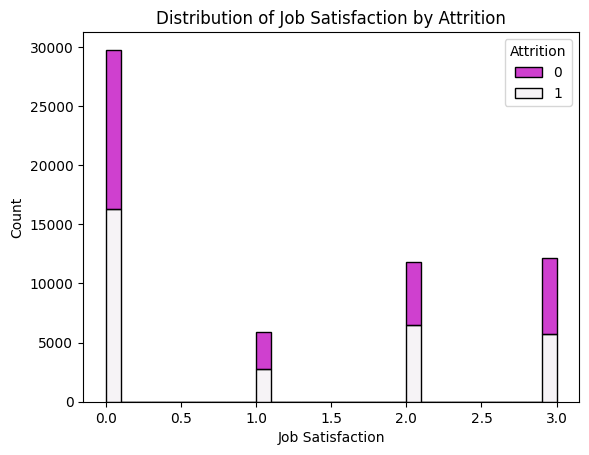

In [75]:
columns = ['Age','Years at Company','Monthly Income','Job Satisfaction']

plt.figure(figsize=(10,8))
for column in columns:
  sns.histplot(data=df, x=column, hue='Attrition', multiple ="stack", palette="light:m_r"  )
  plt.title(f'Distribution of {column} by Attrition')
  plt.xlabel(column)
  plt.ylabel('Count')
  plt.show()

**MODEL BUILDING**

In [76]:
x = df.drop('Attrition',axis=1)
y = df['Attrition']


In [77]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size =0.2,random_state =100)

In [78]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(x_train,y_train)

LogisticRegression()

In [79]:
y_pred = classifier.predict(x_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.52      0.31      0.39      5633
           1       0.55      0.74      0.63      6280

    accuracy                           0.54     11913
   macro avg       0.53      0.53      0.51     11913
weighted avg       0.53      0.54      0.52     11913



In [80]:
from sklearn.metrics import accuracy_score
print('accuracy_score:',accuracy_score(y_test,y_pred))


accuracy_score: 0.5394946696885755


In [81]:
from sklearn.ensemble import AdaBoostClassifier
adb = AdaBoostClassifier()
adb_model = adb.fit(x_train,y_train)

In [82]:
y_pred = adb.predict(x_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.53      0.37      0.43      5633
           1       0.56      0.71      0.62      6280

    accuracy                           0.55     11913
   macro avg       0.55      0.54      0.53     11913
weighted avg       0.55      0.55      0.54     11913



In [83]:
print("the accuracy of the model is ",adb_model.score(x_test,y_pred))


the accuracy of the model is  1.0


In [84]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print("confusion matrix:\n",cm)

confusion matrix:
 [[2066 3567]
 [1805 4475]]


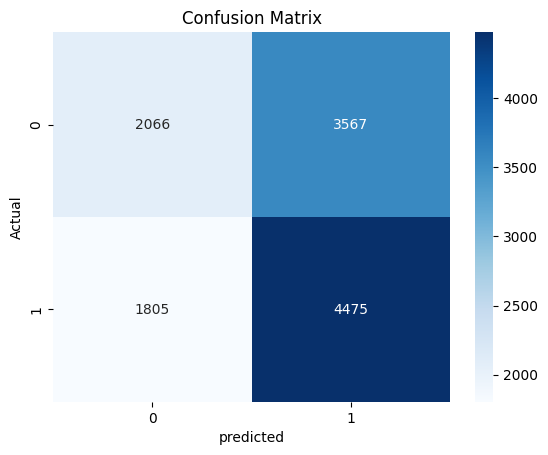

In [85]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap= "Blues",fmt ="g")
plt.xlabel("predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [86]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators =10,random_state =0)
clf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

In [87]:
y_pred = clf.predict(x_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.49      0.55      0.52      5633
           1       0.55      0.49      0.52      6280

    accuracy                           0.52     11913
   macro avg       0.52      0.52      0.52     11913
weighted avg       0.52      0.52      0.52     11913



In [88]:
accuracy = accuracy_score(y_test,y_pred)
print(f"Accuracy:{'{:.2f}%'.format(accuracy*100)}")


Accuracy:52.04%


In [89]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print("confusion matrix:\n",cm)

confusion matrix:
 [[3109 2524]
 [3190 3090]]


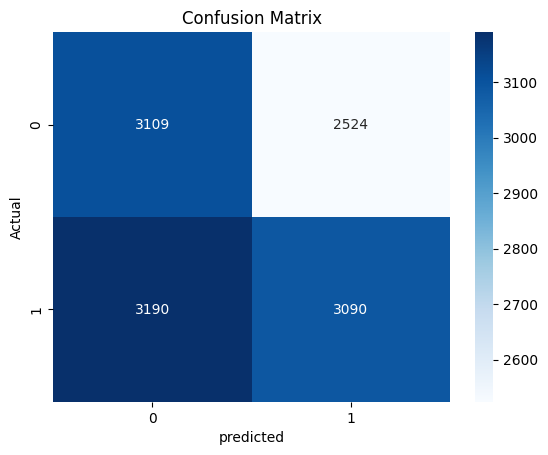

In [90]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap= "Blues",fmt ="g")
plt.xlabel("predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

##**INSIGHTS and RECOMMENTATIONS**

###**Insights**:

* **Age**: There's a slight tendency for younger employees to have higher attrition rates. This might indicate that younger employees are more likely to explore other job opportunities or may not feel as settled in their current roles.


* **Years at Company**: The analysis doesn't show a strong correlation between years at the company and attrition. However, there's a slight increase in attrition for employees who have been with the company for a shorter duration, suggesting that new hires might need more support or engagement to stay.

* **Monthly Income**: Lower monthly income appears to be correlated with higher attrition rates. This aligns with the expectation that employees might seek better-paying opportunities elsewhere if they feel their compensation is inadequate.

* **Job Satisfaction**: Lower job satisfaction is a strong predictor of attrition. This is evident in the lower job satisfaction scores for employees who have left the company, indicating that enhancing job satisfaction is crucial for retention.


###**Recommendations:**

* **Target Younger Employees**: Implement mentorship programs, career development opportunities, and initiatives to foster a sense of belonging for younger employees to increase their retention.

* **Focus on New Hire Onboarding**: Provide comprehensive onboarding and support for new hires to help them quickly integrate into the company culture and understand their roles.

* **Review Compensation and Benefits**: Conduct regular salary reviews to ensure employees are compensated fairly and offer competitive benefits packages to attract and retain talent.

* **Improve Job Satisfaction**: Implement programs to increase job satisfaction, such as:

    * Offering flexible work arrangements
    * Providing opportunities for professional development
    * Recognizing and rewarding employee contributions
    * Fostering a positive and inclusive work environment
    * Promoting work-life balance
    * Conducting regular employee feedback surveys to identify areas for improvement